<a href="https://colab.research.google.com/github/chaitubhure/Numeric-Password-Cracking/blob/master/NumericPW_Cracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

In [0]:
passcode_length = 500
passcode_lower_bound = 0
passcode_upper_bound = 9

population_size = 10
num_parents = 5
elite_size = 2

In [0]:
secret_passcode = [1,6,0,5,2,0,1,5,9,2]
for x in range(passcode_length):
    secret_passcode.append(int(round(random.uniform(passcode_lower_bound,passcode_upper_bound),0)))

print(secret_passcode)

[1, 6, 0, 5, 2, 0, 1, 5, 9, 2, 9, 8, 6, 8, 1, 6, 8, 7, 4, 5, 2, 0, 7, 8, 9, 7, 9, 3, 1, 1, 1, 6, 4, 6, 6, 4, 1, 1, 2, 9, 8, 6, 0, 5, 6, 8, 1, 4, 5, 4, 1, 2, 7, 7, 7, 8, 5, 2, 2, 2, 9, 5, 8, 4, 4, 5, 5, 2, 0, 8, 8, 8, 0, 0, 6, 6, 2, 5, 2, 2, 7, 0, 6, 3, 2, 9, 7, 8, 7, 6, 2, 5, 8, 7, 5, 6, 5, 7, 5, 6, 7, 4, 7, 7, 0, 2, 3, 0, 0, 8, 3, 3, 7, 1, 2, 8, 3, 2, 9, 4, 4, 7, 6, 5, 0, 6, 3, 2, 6, 8, 3, 2, 3, 5, 5, 8, 1, 9, 1, 6, 3, 5, 9, 3, 1, 3, 4, 4, 3, 1, 3, 2, 8, 5, 0, 5, 0, 3, 0, 8, 9, 0, 8, 0, 4, 7, 7, 8, 1, 1, 2, 7, 8, 9, 1, 1, 4, 0, 6, 8, 4, 8, 6, 5, 8, 8, 3, 0, 6, 6, 5, 0, 7, 5, 4, 3, 6, 6, 5, 3, 6, 1, 3, 1, 7, 6, 7, 4, 3, 3, 5, 6, 1, 0, 3, 6, 7, 1, 4, 7, 3, 1, 2, 2, 0, 5, 9, 3, 1, 1, 1, 3, 2, 7, 2, 1, 7, 2, 0, 2, 5, 5, 2, 5, 4, 8, 0, 4, 1, 7, 0, 1, 4, 1, 2, 6, 5, 0, 3, 7, 6, 3, 0, 4, 2, 3, 5, 3, 8, 7, 9, 7, 8, 3, 3, 6, 6, 5, 8, 8, 3, 9, 6, 9, 8, 5, 0, 8, 2, 3, 4, 9, 8, 6, 5, 6, 3, 6, 5, 4, 2, 5, 6, 2, 6, 0, 6, 8, 3, 8, 6, 2, 4, 3, 1, 6, 5, 3, 5, 6, 8, 7, 2, 8, 4, 7, 3, 5, 7, 5, 1, 6, 6, 

In [0]:
population = []
for i in range(population_size):
    chromosome = []
    for x in range(passcode_length):
        chromosome.append(int(round(random.uniform(passcode_lower_bound,passcode_upper_bound),0)))
    population.append(chromosome)

In [0]:
def fitness(population):
    fitness_scores = []
    for chromosome in population:
        matches = 0
        for index in range(passcode_length):
            if secret_passcode[index] == chromosome[index]:
                matches += 1
        result = [chromosome,matches]
        fitness_scores.append(result)
    return fitness_scores

In [0]:
def select_parents(fitness_scores):
    parents_list = []
    for chromosome in sorted(fitness_scores, key=lambda x: x[1], reverse = True)[:num_parents]:
        parents_list.append(chromosome[0])
    return(parents_list)

In [0]:
# breeding logic
def breed(parent1,parent2):
    child = []

    parent1 = parents[0]
    parent2 = parents[1]

    geneA = int(random.random() * passcode_length)
    geneB = int(random.random() * passcode_length)

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(0,passcode_length):
        if (i < startGene) or (i > endGene):
            child.append(parent1[i])
        else:
            child.append(parent2[i])
    return child

# breeding and elitism
def create_children(parents_pool):
    children = []
    num_new_children = len(population) - elite_size

    for i in range(0,elite_size):
        children.append(parents_pool[i])

    for i in range(0,num_new_children):
        parent1 = parents_pool[int(random.random() * len(parents_pool))]
        parent2 = parents_pool[int(random.random() * len(parents_pool))]
        children.append(breed(parent1,parent2))
    return children

In [0]:
def mutation(children_set):
    for i in range(len(children_set)):
        if random.random() > 0.1:
            continue
        else:
            mutated_position = int(random.random() * passcode_length)
            mutation = int(round(random.uniform(passcode_lower_bound,passcode_upper_bound+1),0))
            children_set[i][mutated_position] = mutation
    return children_set

In [0]:
success = []
generations = 0
t0 = time.time()
while True:

    fitness_scores = fitness(population)
    success.append(max([i[1] for i in fitness_scores]))
    if max([i[1] for i in fitness_scores]) == passcode_length:
        print("Cracked in {} generations, and {} seconds! \nSecret passcode = {} \nDiscovered passcode = {}".format(generations,time.time() - t0,secret_passcode,[i[0] for i in fitness_scores if i[1] == passcode_length][0]))
        break
    parents = select_parents(fitness_scores)
    children = create_children(parents)
    population = mutation(children)
    generations += 1

Cracked in 35440 generations, and 50.865713357925415 seconds! 
Secret passcode = [1, 6, 0, 5, 2, 0, 1, 5, 9, 2, 9, 8, 6, 8, 1, 6, 8, 7, 4, 5, 2, 0, 7, 8, 9, 7, 9, 3, 1, 1, 1, 6, 4, 6, 6, 4, 1, 1, 2, 9, 8, 6, 0, 5, 6, 8, 1, 4, 5, 4, 1, 2, 7, 7, 7, 8, 5, 2, 2, 2, 9, 5, 8, 4, 4, 5, 5, 2, 0, 8, 8, 8, 0, 0, 6, 6, 2, 5, 2, 2, 7, 0, 6, 3, 2, 9, 7, 8, 7, 6, 2, 5, 8, 7, 5, 6, 5, 7, 5, 6, 7, 4, 7, 7, 0, 2, 3, 0, 0, 8, 3, 3, 7, 1, 2, 8, 3, 2, 9, 4, 4, 7, 6, 5, 0, 6, 3, 2, 6, 8, 3, 2, 3, 5, 5, 8, 1, 9, 1, 6, 3, 5, 9, 3, 1, 3, 4, 4, 3, 1, 3, 2, 8, 5, 0, 5, 0, 3, 0, 8, 9, 0, 8, 0, 4, 7, 7, 8, 1, 1, 2, 7, 8, 9, 1, 1, 4, 0, 6, 8, 4, 8, 6, 5, 8, 8, 3, 0, 6, 6, 5, 0, 7, 5, 4, 3, 6, 6, 5, 3, 6, 1, 3, 1, 7, 6, 7, 4, 3, 3, 5, 6, 1, 0, 3, 6, 7, 1, 4, 7, 3, 1, 2, 2, 0, 5, 9, 3, 1, 1, 1, 3, 2, 7, 2, 1, 7, 2, 0, 2, 5, 5, 2, 5, 4, 8, 0, 4, 1, 7, 0, 1, 4, 1, 2, 6, 5, 0, 3, 7, 6, 3, 0, 4, 2, 3, 5, 3, 8, 7, 9, 7, 8, 3, 3, 6, 6, 5, 8, 8, 3, 9, 6, 9, 8, 5, 0, 8, 2, 3, 4, 9, 8, 6, 5, 6, 3, 6, 5, 4, 2, 5, 6, 2, 6, 0, 

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


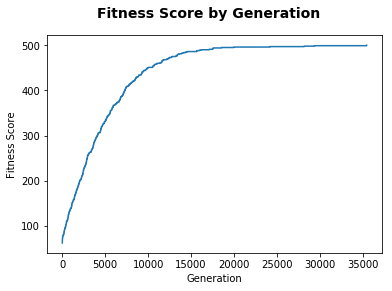

In [0]:
fig = plt.figure()
plt.plot(list(range(generations+1)), success)
fig.suptitle('Fitness Score by Generation', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness Score')
plt.show()